# Visualizações

Aqui são feitas visualizações mais aprofundadas dos dados pré-processados

In [3]:
# Se necessário
%pip install wordcloud
%pip install stanza

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 435 kB 33.6 MB/s            
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 691 kB 26.4 MB/s            
     |████████████████████████████████| 881.9 MB 7.4 kB/s              
     |████████████████████████████████| 240 kB 92.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234906 sha256=747591dd3838665bd75b38f9265d9b3d19da9053306482de7b244ff6f5481dba
  Stored in directory: /home/ec2-user/.cache/pip/wheels/20/ae/c3/a0104b9bcd7396b30ea031e758ff74ab197e63f203e895ad69
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [4]:
from python_scripts.save_load import load_df_from_bucket
from python_scripts.plots import plot_word_counts, plot_cloud
from python_scripts.processing import evaluate_words_lemmas
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = load_df_from_bucket('dados_processados.csv', tipo='processado')

# Corrigir words e lemmas de volta para listas em vez de strings
df[['words', 'lemmas']] = df.apply(evaluate_words_lemmas, axis=1, result_type='expand')

df.head()

,fake,text,words,lemmas,avg_sent_len,avg_word_len,words_str,lemmas_str
0,0,A divisão do STF ao meio entre partidários e ...,"[divisão, STF, meio, partidários, independente...","[divisão, STF, meio, partidário, independente,...",10.747664,6.690641,divisão STF meio partidários independentes fic...,divisão STF meio partidário independente ficar...
1,1,"General manda recado para STF: ""Abaixaram as c...","[General, manda, recado, STF, Abaixaram, calça...","[general, mandar, recado, STF, abaixar, calça,...",11.000000,6.461584,General manda recado STF Abaixaram calças Cong...,general mandar recado STF abaixar calça congre...
2,1,O Nordeste acordou! Lula e o PT são enxotados:...,"[Nordeste, acordou, Lula, PT, enxotados, Chega...","[nordeste, acordar, Lula, PT, enxotar, chegar,...",7.333333,6.565873,Nordeste acordou Lula PT enxotados Chega bande...,nordeste acordar Lula PT enxotar chegar bandei...
3,0,"Dois relatórios da Polícia Federal, com análi...","[Dois, relatórios, Polícia, Federal, análises,...","[dois, relatório, Polícia, Federal, análise, m...",17.000000,7.237319,Dois relatórios Polícia Federal análises mater...,dois relatório Polícia Federal análise materia...
4,1,Coreia do Norte declara status de QUASE-GUERRA...,"[Coreia, Norte, declara, status, QUASE-GUERRA,...","[Coreia, Norte, declarar, status, QUASE-GUERRA...",11.666667,6.513799,Coreia Norte declara status QUASE-GUERRA mobil...,Coreia Norte declarar status QUASE-GUERRA mobi...


## Verificar presença de nulos

O dataset original não possui valores nulos (constituído apenas da notícia e se é falsa ou não). Contudo, no notebook preprocessing.ipynb, foram introduzidas novas features, calculadas a partir do texto. Uma rápida verificação é realizada para assegurar que não houve nenhum erro durante o cálculo destas features.

In [7]:
df.isna().sum()

fake            0
text            0
words           0
lemmas          0
avg_sent_len    0
avg_word_len    0
words_str       0
lemmas_str      0
dtype: int64

## Nuvens de palavras
Já foram mostradas no notebook de pré-processamento (preprocessing.ipynb), repetidas aqui para facilidade de verificação junto às demais visualizações

#### Palavras

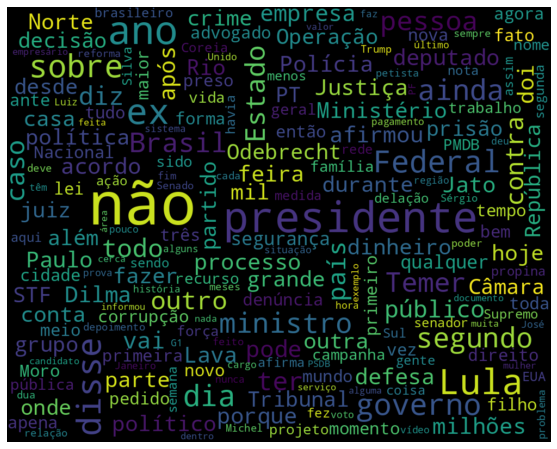

In [8]:
plot_cloud(' '.join([x for x in df['words_str']]))

#### Lemmas

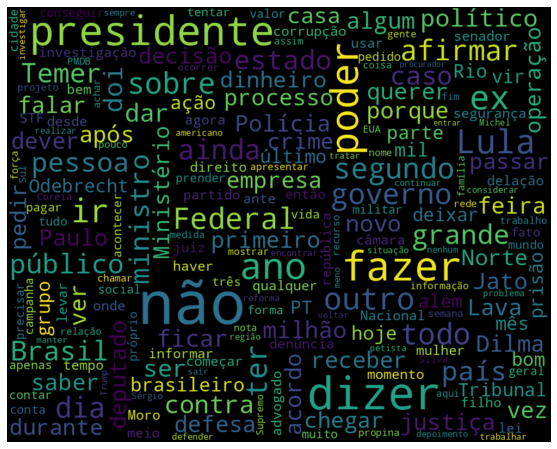

In [9]:
plot_cloud(' '.join([x for x in df['lemmas_str']]))

## Contagem de palavras

#### Palavras

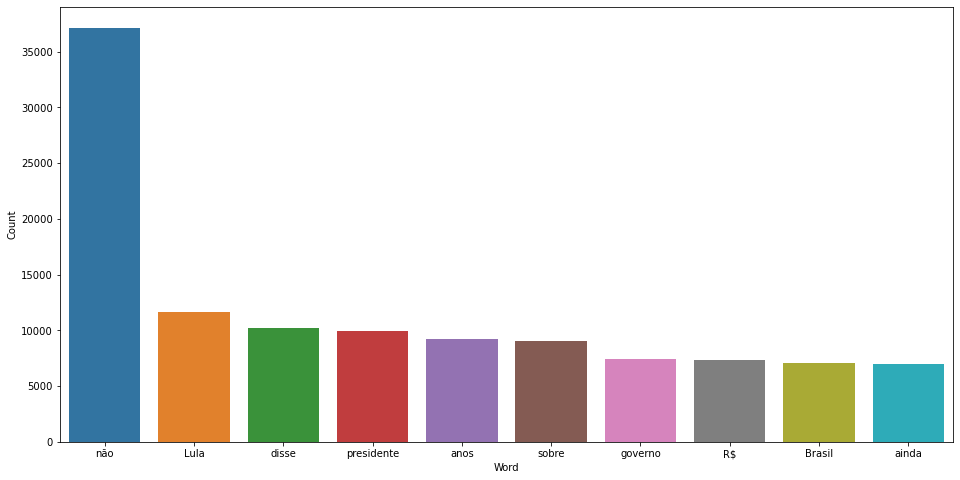

In [10]:
token_list = list(list([a for b in df.words.tolist() for a in b]))
plot_word_counts(token_list, n=10)

#### Lemmas

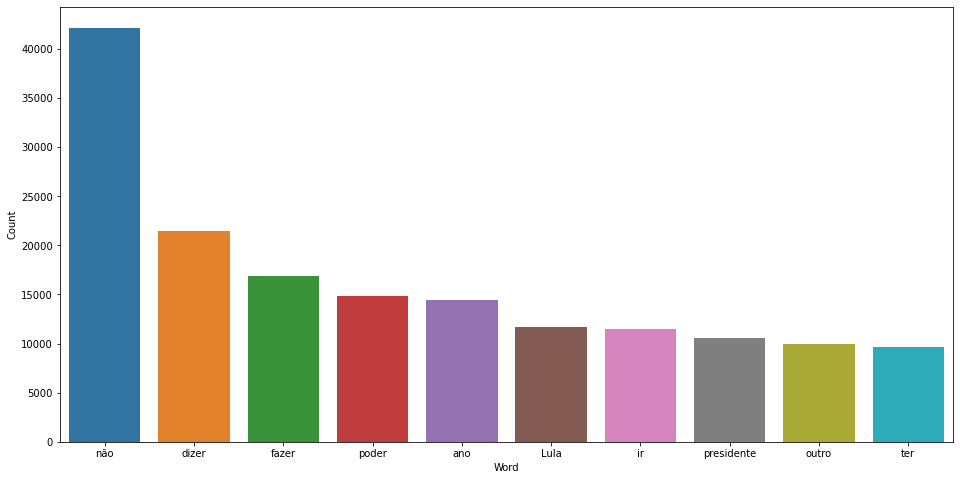

In [11]:
token_list = list(list([a for b in df.lemmas.tolist() for a in b]))
plot_word_counts(token_list, n=10)

# Tamanhos médios de senteças e palavras

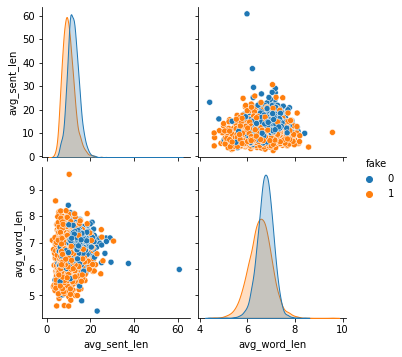

In [16]:
sns.pairplot(df, hue='fake')

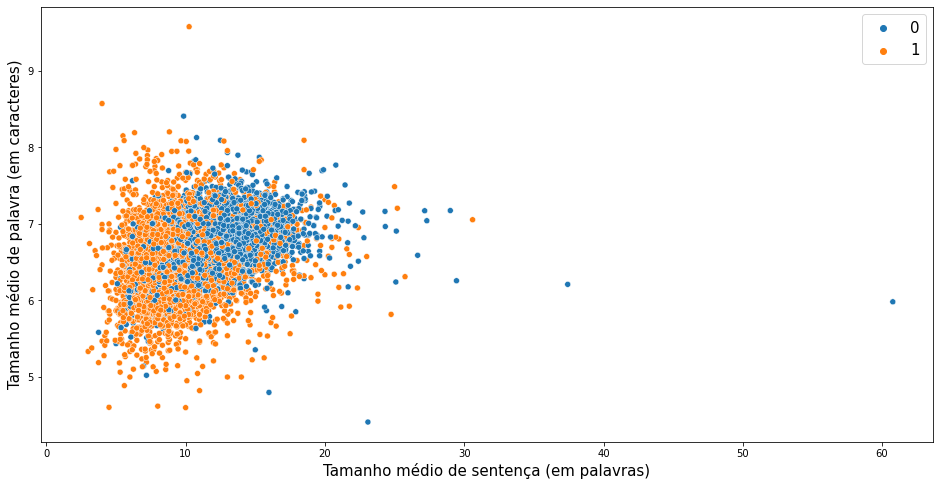

In [15]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)
plt.show()

#### Zoom para visualizar melhor sem outliers

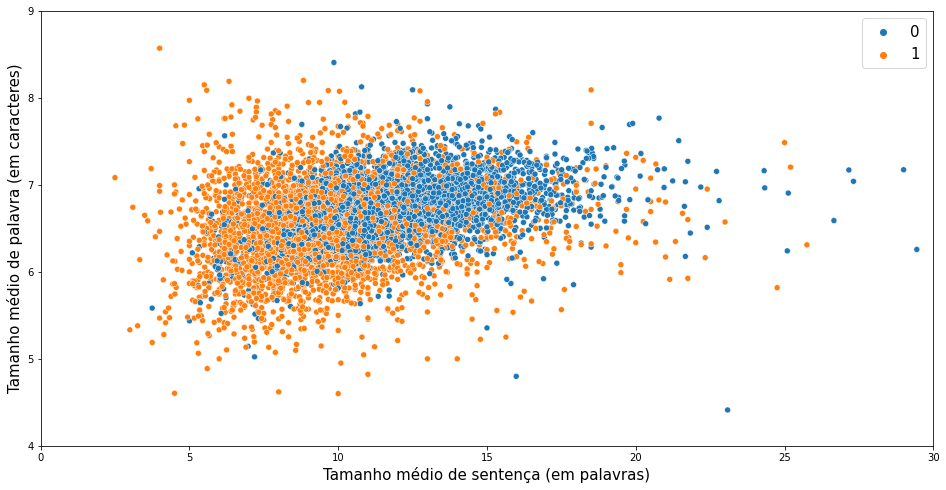

In [13]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.set(xlim=(0, 30))
ax.set(ylim=(4,9))
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)

plt.show()